Preprocessing given dataset for the Time-Series forecasting. 

Pandas library provides excellent built-in support for time series data.  
Pandas represent time-series datasets as a Series. Dataframe is a collection of Series.   
A Series in an 1-Dimensional array with dates/time-labels for each row.  

In [1]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sb 

from pandas.plotting import lag_plot, autocorrelation_plot 
%matplotlib inline 

In [2]:
fem_birth = pd.read_csv('../Datasets/daily-total-female-births-CA.csv', header=0) 
fem_birth 

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55


In [3]:
fem_birth['date'].dtype 

dtype('O')

Loading data with parsed dates - 

Sometimes it will be difficult to directly parse objects into time data.  
So;  
dateparse = lambda x: pd.datetime.strptime(x, %Y-%m-%d %H:%M:%S)    
                                OR       
dateparse = lambda x: pd.to_datetime(x, format='%Y-%m-%d')  
    
df = pd.read_csv('dataset', parse_dates = [<date_column>], date_format = dateparse)  

In [4]:
dateparse = lambda x: pd.to_datetime(x, format='%Y-%m-%d')   
fem_birth_data = pd.read_csv('../Datasets/daily-total-female-births-CA.csv', header=0, parse_dates=[0], date_format=dateparse)  
fem_birth_data  

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55


In [5]:
fem_birth_data['date'].dtype 

dtype('O')

In [6]:
fem_birth_data = pd.read_csv('../Datasets/daily-total-female-births-CA.csv', header=0, parse_dates=[0])     # parse_dates = [date_column]  
fem_birth_data    

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55


In [7]:
fem_birth_data['date'].dtype 

dtype('<M8[ns]')

In [8]:
fem_birth_data.shape 

(365, 2)

In [9]:
print(f" Births in January : \n{ fem_birth_data[(fem_birth_data['date'] >= '1959-01-01') & (fem_birth_data['date'] <= '1959-02-01')] } ")  

 Births in January : 
         date  births
0  1959-01-01      35
1  1959-01-02      32
2  1959-01-03      30
3  1959-01-04      31
4  1959-01-05      44
5  1959-01-06      29
6  1959-01-07      45
7  1959-01-08      43
8  1959-01-09      38
9  1959-01-10      27
10 1959-01-11      38
11 1959-01-12      33
12 1959-01-13      55
13 1959-01-14      47
14 1959-01-15      45
15 1959-01-16      37
16 1959-01-17      50
17 1959-01-18      43
18 1959-01-19      41
19 1959-01-20      52
20 1959-01-21      34
21 1959-01-22      53
22 1959-01-23      39
23 1959-01-24      32
24 1959-01-25      37
25 1959-01-26      43
26 1959-01-27      39
27 1959-01-28      35
28 1959-01-29      44
29 1959-01-30      38
30 1959-01-31      24
31 1959-02-01      23 


Loading data as Series - 

In [10]:
series = pd.read_csv('../Datasets/daily-total-female-births-CA.csv', header=0, parse_dates=[0], index_col=0).squeeze("columns")  
# index_col = <column_to_be_the_index>  
series   

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
              ..
1959-12-27    37
1959-12-28    52
1959-12-29    48
1959-12-30    55
1959-12-31    50
Name: births, Length: 365, dtype: int64

In [11]:
series.shape  

(365,)

In [12]:
print(f"Births in January : \n{series['1959-01']} ") 

Births in January : 
date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
1959-01-11    38
1959-01-12    33
1959-01-13    55
1959-01-14    47
1959-01-15    45
1959-01-16    37
1959-01-17    50
1959-01-18    43
1959-01-19    41
1959-01-20    52
1959-01-21    34
1959-01-22    53
1959-01-23    39
1959-01-24    32
1959-01-25    37
1959-01-26    43
1959-01-27    39
1959-01-28    35
1959-01-29    44
1959-01-30    38
1959-01-31    24
Name: births, dtype: int64 


Descriptive Statistics - 

In [13]:
fem_birth_data.describe()  

,date,births
count,365,365.000000
mean,1959-07-02 00:00:00,41.980822
min,1959-01-01 00:00:00,23.000000
25%,1959-04-02 00:00:00,37.000000
50%,1959-07-02 00:00:00,42.000000
75%,1959-10-01 00:00:00,46.000000
max,1959-12-31 00:00:00,73.000000
std,NaN,7.348257


In [14]:
series.describe()  

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: births, dtype: float64

------------------------------------------------------------------------------------------------------------------------------------------------
# Feature Engineering - 

Feature Engineering refers to modifyiing, deleting, or combining existing raw features into our data to create new features. These new features will help us enhancing the overall performance of the forecasting model.  
Input variables are also called features in the field of machine learning, and the task before us is to create or invent new input features from our time series dataset.  
---> Datetime features    ---> Lag features    ---> Window features    ---> Expanding features  

Date-Time Features : Components of time step itself for each observation.  

In [15]:
features_fbth = fem_birth_data.copy() 
features_fbth['year'] = fem_birth_data['date'].dt.year  
features_fbth['month'] = fem_birth_data['date'].dt.month  
features_fbth['day'] = fem_birth_data['date'].dt.day  
features_fbth  

,date,births,year,month,day
0,1959-01-01,35,1959,1,1
1,1959-01-02,32,1959,1,2
2,1959-01-03,30,1959,1,3
3,1959-01-04,31,1959,1,4
4,1959-01-05,44,1959,1,5
...,...,...,...,...,...
360,1959-12-27,37,1959,12,27
361,1959-12-28,52,1959,12,28
362,1959-12-29,48,1959,12,29
363,1959-12-30,55,1959,12,30


Lag Features : Values at prior timestamps. To shift dates at a specific value.    

In [16]:
features_fbth['lag1'] =features_fbth['births'].shift(1) 
features_fbth['lag2'] =features_fbth['births'].shift(365) 
features_fbth['lag3'] =features_fbth['births'].shift(150)  
features_fbth 

,date,births,year,month,day,lag1,lag2,lag3
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN,NaN
2,1959-01-03,30,1959,1,3,32.0,NaN,NaN
3,1959-01-04,31,1959,1,4,30.0,NaN,NaN
4,1959-01-05,44,1959,1,5,31.0,NaN,NaN
...,...,...,...,...,...,...,...,...
360,1959-12-27,37,1959,12,27,34.0,NaN,36.0
361,1959-12-28,52,1959,12,28,37.0,NaN,41.0
362,1959-12-29,48,1959,12,29,52.0,NaN,50.0
363,1959-12-30,55,1959,12,30,48.0,NaN,39.0


Window Features : Summary of values over a prior window of prior time step.  

Rolling Window : Add summary of values at previous time steps.  

In [17]:
features_fbth['roll_mean'] = fem_birth_data['births'].rolling(window = 2).mean()  
features_fbth 

,date,births,year,month,day,lag1,lag2,lag3,roll_mean
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN,NaN,33.5
2,1959-01-03,30,1959,1,3,32.0,NaN,NaN,31.0
3,1959-01-04,31,1959,1,4,30.0,NaN,NaN,30.5
4,1959-01-05,44,1959,1,5,31.0,NaN,NaN,37.5
...,...,...,...,...,...,...,...,...,...
360,1959-12-27,37,1959,12,27,34.0,NaN,36.0,35.5
361,1959-12-28,52,1959,12,28,37.0,NaN,41.0,44.5
362,1959-12-29,48,1959,12,29,52.0,NaN,50.0,50.0
363,1959-12-30,55,1959,12,30,48.0,NaN,39.0,51.5


In [18]:
features_fbth['roll_max'] = fem_birth_data['births'].rolling(window = 3).max()  
features_fbth 

,date,births,year,month,day,lag1,lag2,lag3,roll_mean,roll_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN,NaN,33.5,NaN
2,1959-01-03,30,1959,1,3,32.0,NaN,NaN,31.0,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,NaN,30.5,32.0
4,1959-01-05,44,1959,1,5,31.0,NaN,NaN,37.5,44.0
...,...,...,...,...,...,...,...,...,...,...
360,1959-12-27,37,1959,12,27,34.0,NaN,36.0,35.5,44.0
361,1959-12-28,52,1959,12,28,37.0,NaN,41.0,44.5,52.0
362,1959-12-29,48,1959,12,29,52.0,NaN,50.0,50.0,52.0
363,1959-12-30,55,1959,12,30,48.0,NaN,39.0,51.5,55.0


Expanding Window : Add summary of all previous data in series.  

In [19]:
features_fbth['expand_max'] = fem_birth_data['births'].expanding().max()  
features_fbth 

,date,births,year,month,day,lag1,lag2,lag3,roll_mean,roll_max,expand_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN,NaN,35.0
1,1959-01-02,32,1959,1,2,35.0,NaN,NaN,33.5,NaN,35.0
2,1959-01-03,30,1959,1,3,32.0,NaN,NaN,31.0,35.0,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,NaN,30.5,32.0,35.0
4,1959-01-05,44,1959,1,5,31.0,NaN,NaN,37.5,44.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...
360,1959-12-27,37,1959,12,27,34.0,NaN,36.0,35.5,44.0,73.0
361,1959-12-28,52,1959,12,28,37.0,NaN,41.0,44.5,52.0,73.0
362,1959-12-29,48,1959,12,29,52.0,NaN,50.0,50.0,52.0,73.0
363,1959-12-30,55,1959,12,30,48.0,NaN,39.0,51.5,55.0,73.0


----------------------------------------------------------------------------------------------------------------------------------------------
# Visualization -  
By visualizing the series, we can identify and detect initial paterns, identify its competence, and spot potential problems such as outliers, missing values, and unequal spaccing.   

# Time Plot -  
The most basic and informative plot for visualizing a time series is the Time Plot.  
It is a line chart of the series values (y1, y2,....) over time (t = 1, 2,....), with temporal labels (e.g., calendar date) on the horizontal axis.  


In [20]:
# dateparse = lambda x: pd.to_datetime(x, format='%Y-%m-%d')   
# airl_miles_data = pd.read_csv('../Datasets/us-airlines-monthly-aircraft-miles-flown.csv', header=0, parse_dates=[0], date_format=dateparse) 

airl_miles_data2 = pd.read_csv('../Datasets/us-airlines-monthly-aircraft-miles-flown.csv', header=0, parse_dates=[0])  
airl_miles_data = pd.read_csv('../Datasets/us-airlines-monthly-aircraft-miles-flown.csv', header=0, parse_dates=[0]) 
# parse_dates = [dates_column] 
airl_miles_data 

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462
...,...,...
91,1970-08-01,14057
92,1970-09-01,16234
93,1970-10-01,12389
94,1970-11-01,11595


<Axes: >

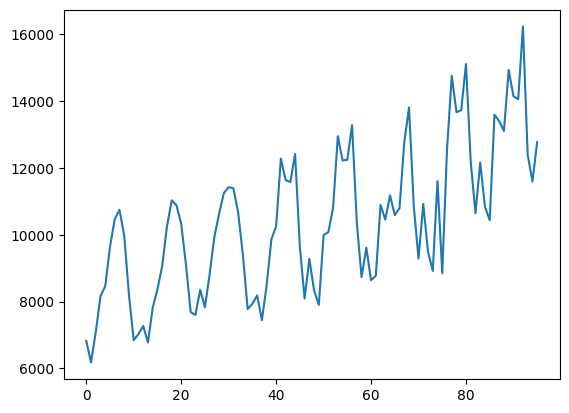

In [21]:
airl_miles_data['MilesMM'].plot() 

In [22]:
dataviz_fbth = fem_birth_data.copy() 
dataviz_fbth 

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55


<Axes: >

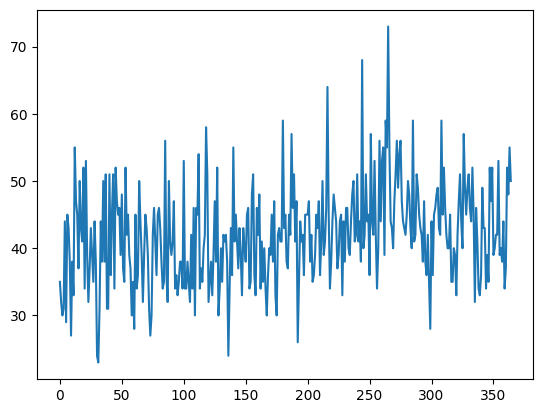

In [23]:
dataviz_fbth['births'].plot() 

In [24]:
# Ensure the index is a datetime index 
dataviz_fbth.index = pd.to_datetime(dataviz_fbth['date']) 
airl_miles_data.index = pd.to_datetime(airl_miles_data['Month'])  

# Convert datetime index to ordinal numbers
dataviz_fbth['date_ordinal'] = dataviz_fbth.index.map(pd.Timestamp.toordinal) 
airl_miles_data['month_ordinal'] = airl_miles_data.index.map(pd.Timestamp.toordinal)  

# print(dataviz_fbth) 
# print(airl_miles_data)  

In [25]:
dataviz_fbth 

,date,births,date_ordinal
date,,,
1959-01-01,1959-01-01,35,715145
1959-01-02,1959-01-02,32,715146
1959-01-03,1959-01-03,30,715147
1959-01-04,1959-01-04,31,715148
1959-01-05,1959-01-05,44,715149
...,...,...,...
1959-12-27,1959-12-27,37,715505
1959-12-28,1959-12-28,52,715506
1959-12-29,1959-12-29,48,715507


In [26]:
airl_miles_data 

,Month,MilesMM,month_ordinal
Month,,,
1963-01-01,1963-01-01,6827,716606
1963-02-01,1963-02-01,6178,716637
1963-03-01,1963-03-01,7084,716665
1963-04-01,1963-04-01,8162,716696
1963-05-01,1963-05-01,8462,716726
...,...,...,...
1970-08-01,1970-08-01,14057,719375
1970-09-01,1970-09-01,16234,719406
1970-10-01,1970-10-01,12389,719436


<Axes: xlabel='date'>

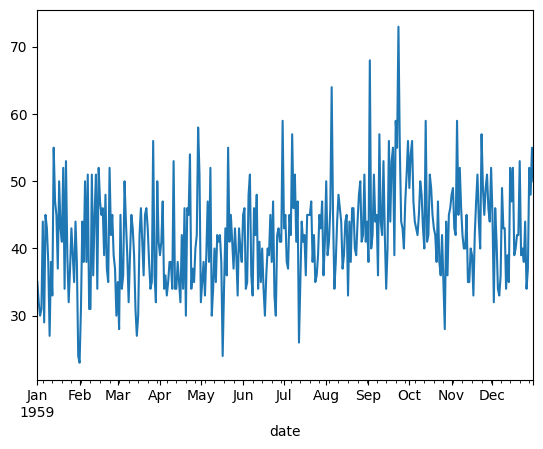

In [27]:
dataviz_fbth['births'].plot() 

<Axes: xlabel='Month'>

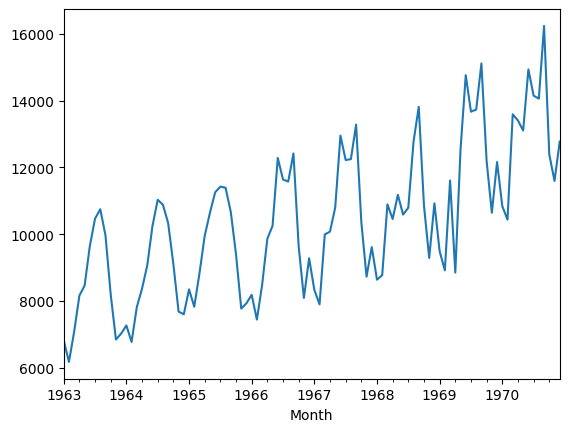

In [28]:
airl_miles_data['MilesMM'].plot() 

->> Zooming In -  
    Zooming in or looking at to a shorter period within the series can reveal patterns that are hidden when viewing the entire series. This is especially important when the time series is long.  


In [29]:
dataviz_fbth2 = dataviz_fbth[(dataviz_fbth['date'] >= '1959-01-01') & (dataviz_fbth['date'] <= '1959-01-20')].copy() 
dataviz_fbth2 

,date,births,date_ordinal
date,,,
1959-01-01,1959-01-01,35,715145
1959-01-02,1959-01-02,32,715146
1959-01-03,1959-01-03,30,715147
1959-01-04,1959-01-04,31,715148
1959-01-05,1959-01-05,44,715149
1959-01-06,1959-01-06,29,715150
1959-01-07,1959-01-07,45,715151
1959-01-08,1959-01-08,43,715152
1959-01-09,1959-01-09,38,715153


<Axes: xlabel='date'>

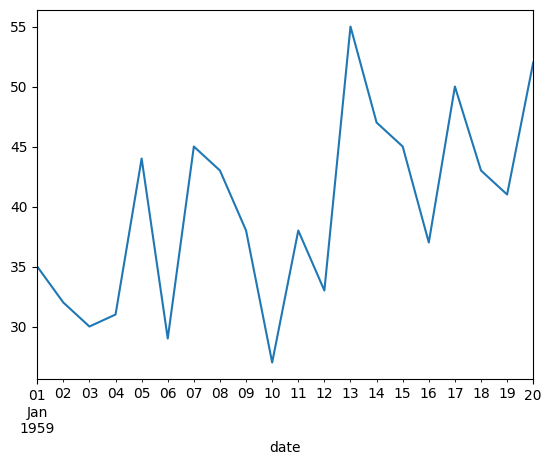

In [30]:
dataviz_fbth2['births'].plot() 

->> Adding Trendlines -  
    Another possibility for better capturing the shape of the trend is to add a trend line. By trying different trend lines one can see what type of trend (e.g., linear, exponential, cubic,...) that best approximates the data.  


<Axes: xlabel='date_ordinal', ylabel='births'>

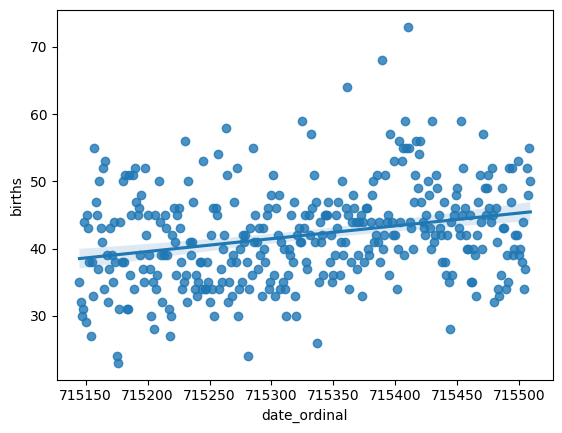

In [31]:
sb.regplot(x='date_ordinal', y='births', data=dataviz_fbth) 

<Axes: xlabel='date_ordinal', ylabel='births'>

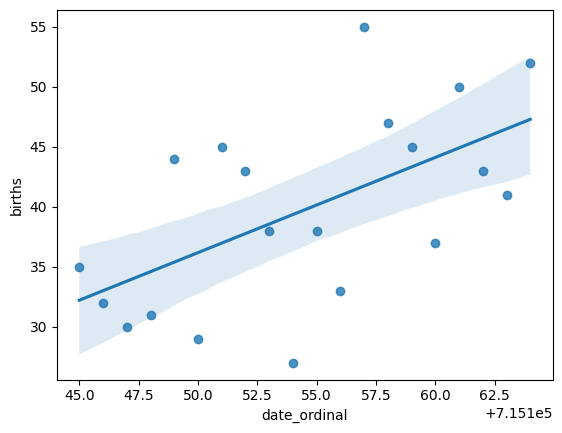

In [32]:
sb.regplot(x='date_ordinal', y='births', data=dataviz_fbth2) 

<Axes: xlabel='date_ordinal', ylabel='births'>

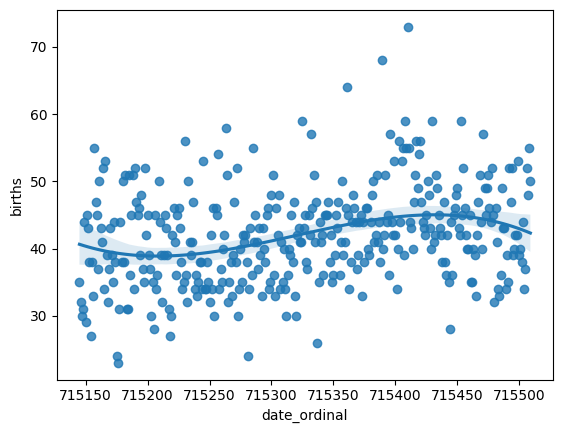

In [33]:
sb.regplot(x='date_ordinal', y='births', data=dataviz_fbth, order=3)      
# sb.regplot(x='date_ordinal', y='births', data=dataviz_fbth, order=2)     # order = Algebraic eq. power   

<Axes: xlabel='date_ordinal', ylabel='births'>

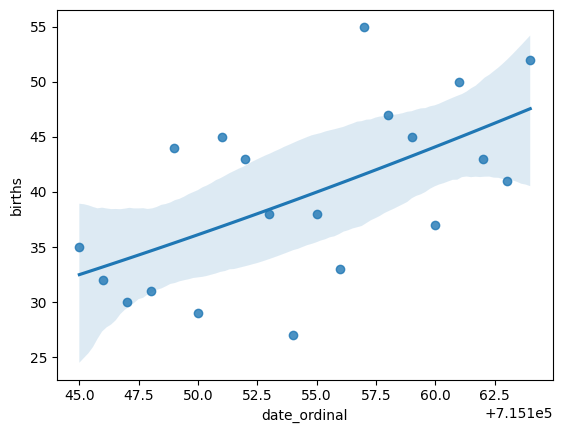

In [34]:
sb.regplot(x='date_ordinal', y='births', data=dataviz_fbth2, order=2)  

<Axes: xlabel='month_ordinal', ylabel='MilesMM'>

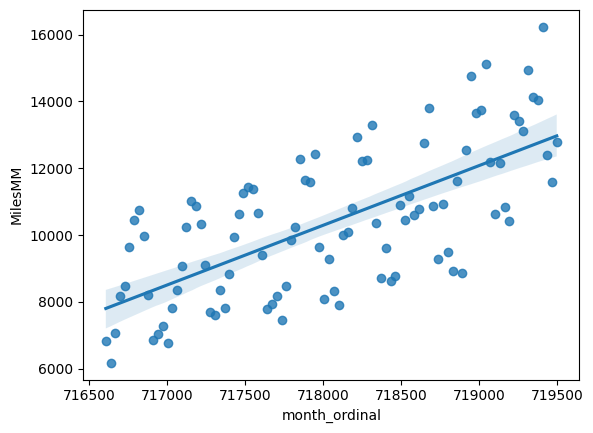

In [35]:
sb.regplot(data=airl_miles_data, x='month_ordinal', y='MilesMM') 

->> Supressing Seasonality -  
    It is often easier to see the overall trends in the data when seasonality is suppressed. Here we supress the seasonal variations in the variables. Suppressing seasonal patterns can be done by plotting the series at a cruder time scale (yearly plotting for a seasonal product sale).  


In [36]:
airl_miles_data['year'] = airl_miles_data['Month'].dt.year 
airl_miles_data 

,Month,MilesMM,month_ordinal,year
Month,,,,
1963-01-01,1963-01-01,6827,716606,1963
1963-02-01,1963-02-01,6178,716637,1963
1963-03-01,1963-03-01,7084,716665,1963
1963-04-01,1963-04-01,8162,716696,1963
1963-05-01,1963-05-01,8462,716726,1963
...,...,...,...,...
1970-08-01,1970-08-01,14057,719375,1970
1970-09-01,1970-09-01,16234,719406,1970
1970-10-01,1970-10-01,12389,719436,1970


In [37]:
airl_miles_data.groupby('year')['MilesMM'].mean()  
# dtset.groupby('<on_the_basis_of_col1>')['<grouped_content_as_per_col1>'] 

year
1963     8300.250000
1964     8849.333333
1965     9619.250000
1966     9929.500000
1967    10542.916667
1968    10747.916667
1969    11972.000000
1970    13124.750000
Name: MilesMM, dtype: float64

<Axes: xlabel='year'>

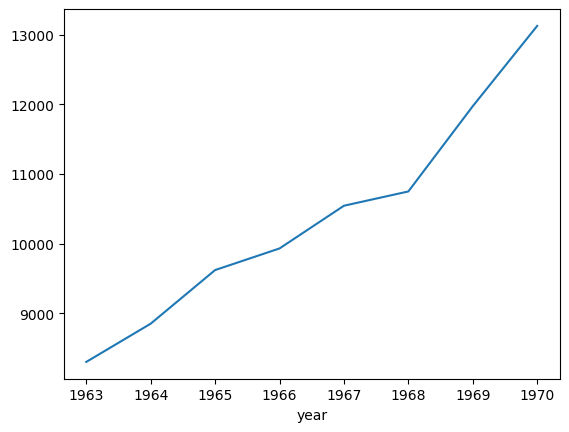

In [38]:
airl_miles_data.groupby('year')['MilesMM'].mean().plot()   

->> Lag Scatterplots -  
    Time series modeling assumes a relationship between an observation and the previous observation. Previous observations in a time series are called lags. A useful type of plot to explore the relationship between each observation and a lag of that observation is called the scatter plot.  
    The just previous observation of the current observation is called lag1, the 2nd previous observation of the current obsevation is lag2,.....going_on....., nth observation for current one is lagn.   


In [39]:
airl_miles_data['lag1'] = airl_miles_data['MilesMM'].shift(1) 
airl_miles_data 

,Month,MilesMM,month_ordinal,year,lag1
Month,,,,,
1963-01-01,1963-01-01,6827,716606,1963,NaN
1963-02-01,1963-02-01,6178,716637,1963,6827.0
1963-03-01,1963-03-01,7084,716665,1963,6178.0
1963-04-01,1963-04-01,8162,716696,1963,7084.0
1963-05-01,1963-05-01,8462,716726,1963,8162.0
...,...,...,...,...,...
1970-08-01,1970-08-01,14057,719375,1970,14147.0
1970-09-01,1970-09-01,16234,719406,1970,14057.0
1970-10-01,1970-10-01,12389,719436,1970,16234.0


<Axes: xlabel='lag1', ylabel='MilesMM'>

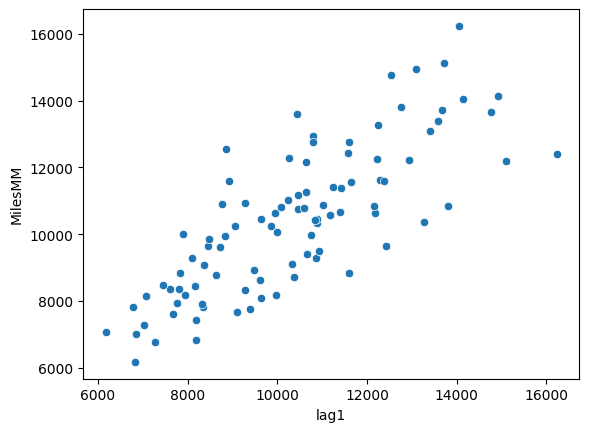

In [40]:
sb.scatterplot(data=airl_miles_data, x='lag1', y='MilesMM') 

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

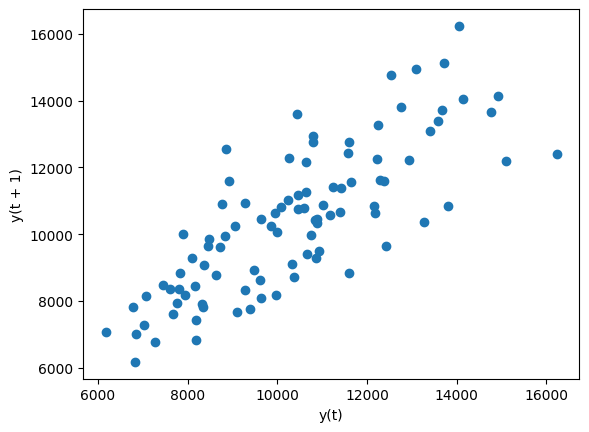

In [41]:
lag_plot(airl_miles_data['MilesMM']) 

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

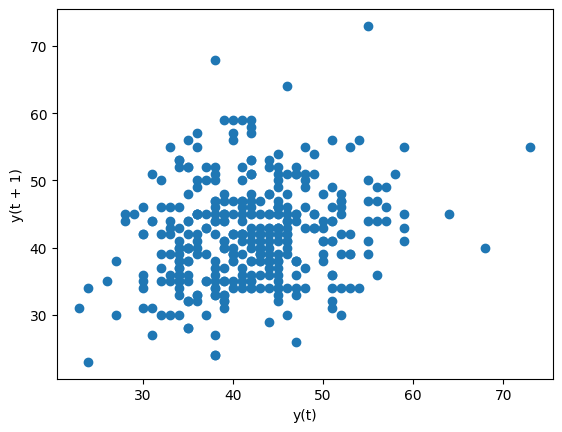

In [42]:
lag_plot(dataviz_fbth['births']) 

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

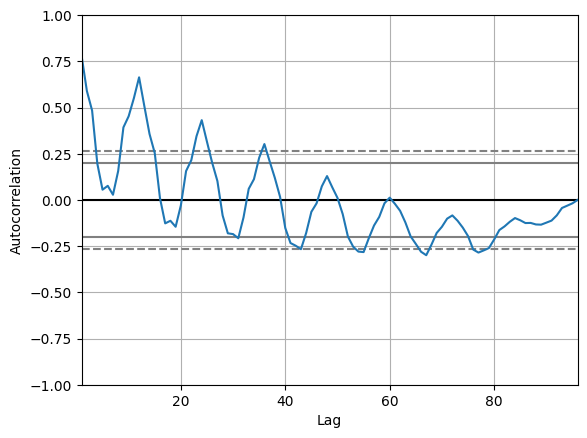

In [43]:
# Autocorrelatioin plot - Correlate all the lag values for the given column of the dataset 

autocorrelation_plot(airl_miles_data['MilesMM']) 

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

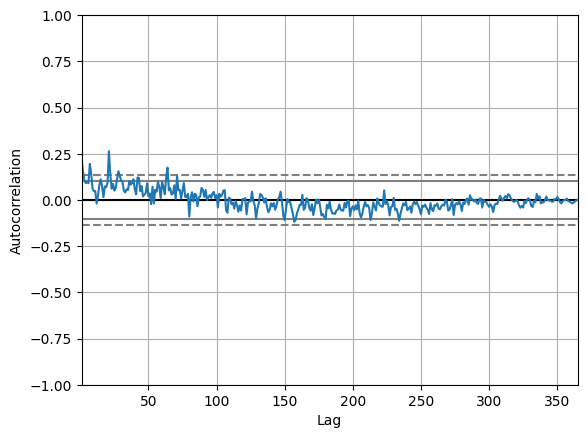

In [44]:
autocorrelation_plot(dataviz_fbth['births']) 

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

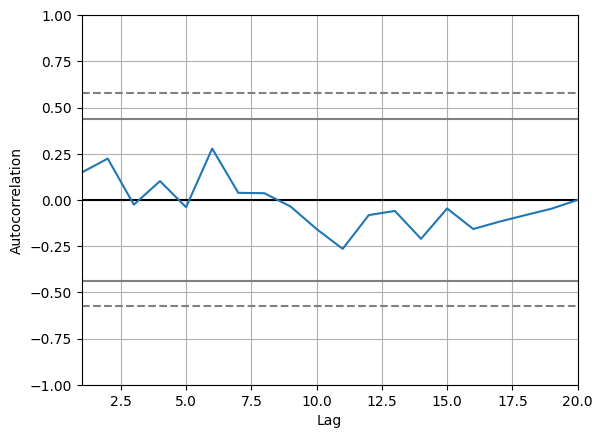

In [45]:
autocorrelation_plot(dataviz_fbth2['births']) 